**Importing Libraries**

In [1]:
import pandas as pd           # dataframe
import numpy as np            # array

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report, matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.duplicated().sum()   # check for similar rows

1081

In [8]:
df.isnull().sum()   # look for null values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.drop_duplicates(inplace=True)      # removing duplicates

Class
0    283253
1       473
Name: count, dtype: int64


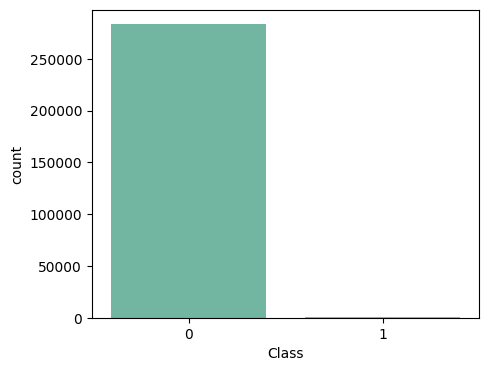

In [10]:
# class count
print(df['Class'].value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Class',data=df, palette = 'Set2')
plt.show()

In [11]:
df.describe().T     # statistical analysis

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


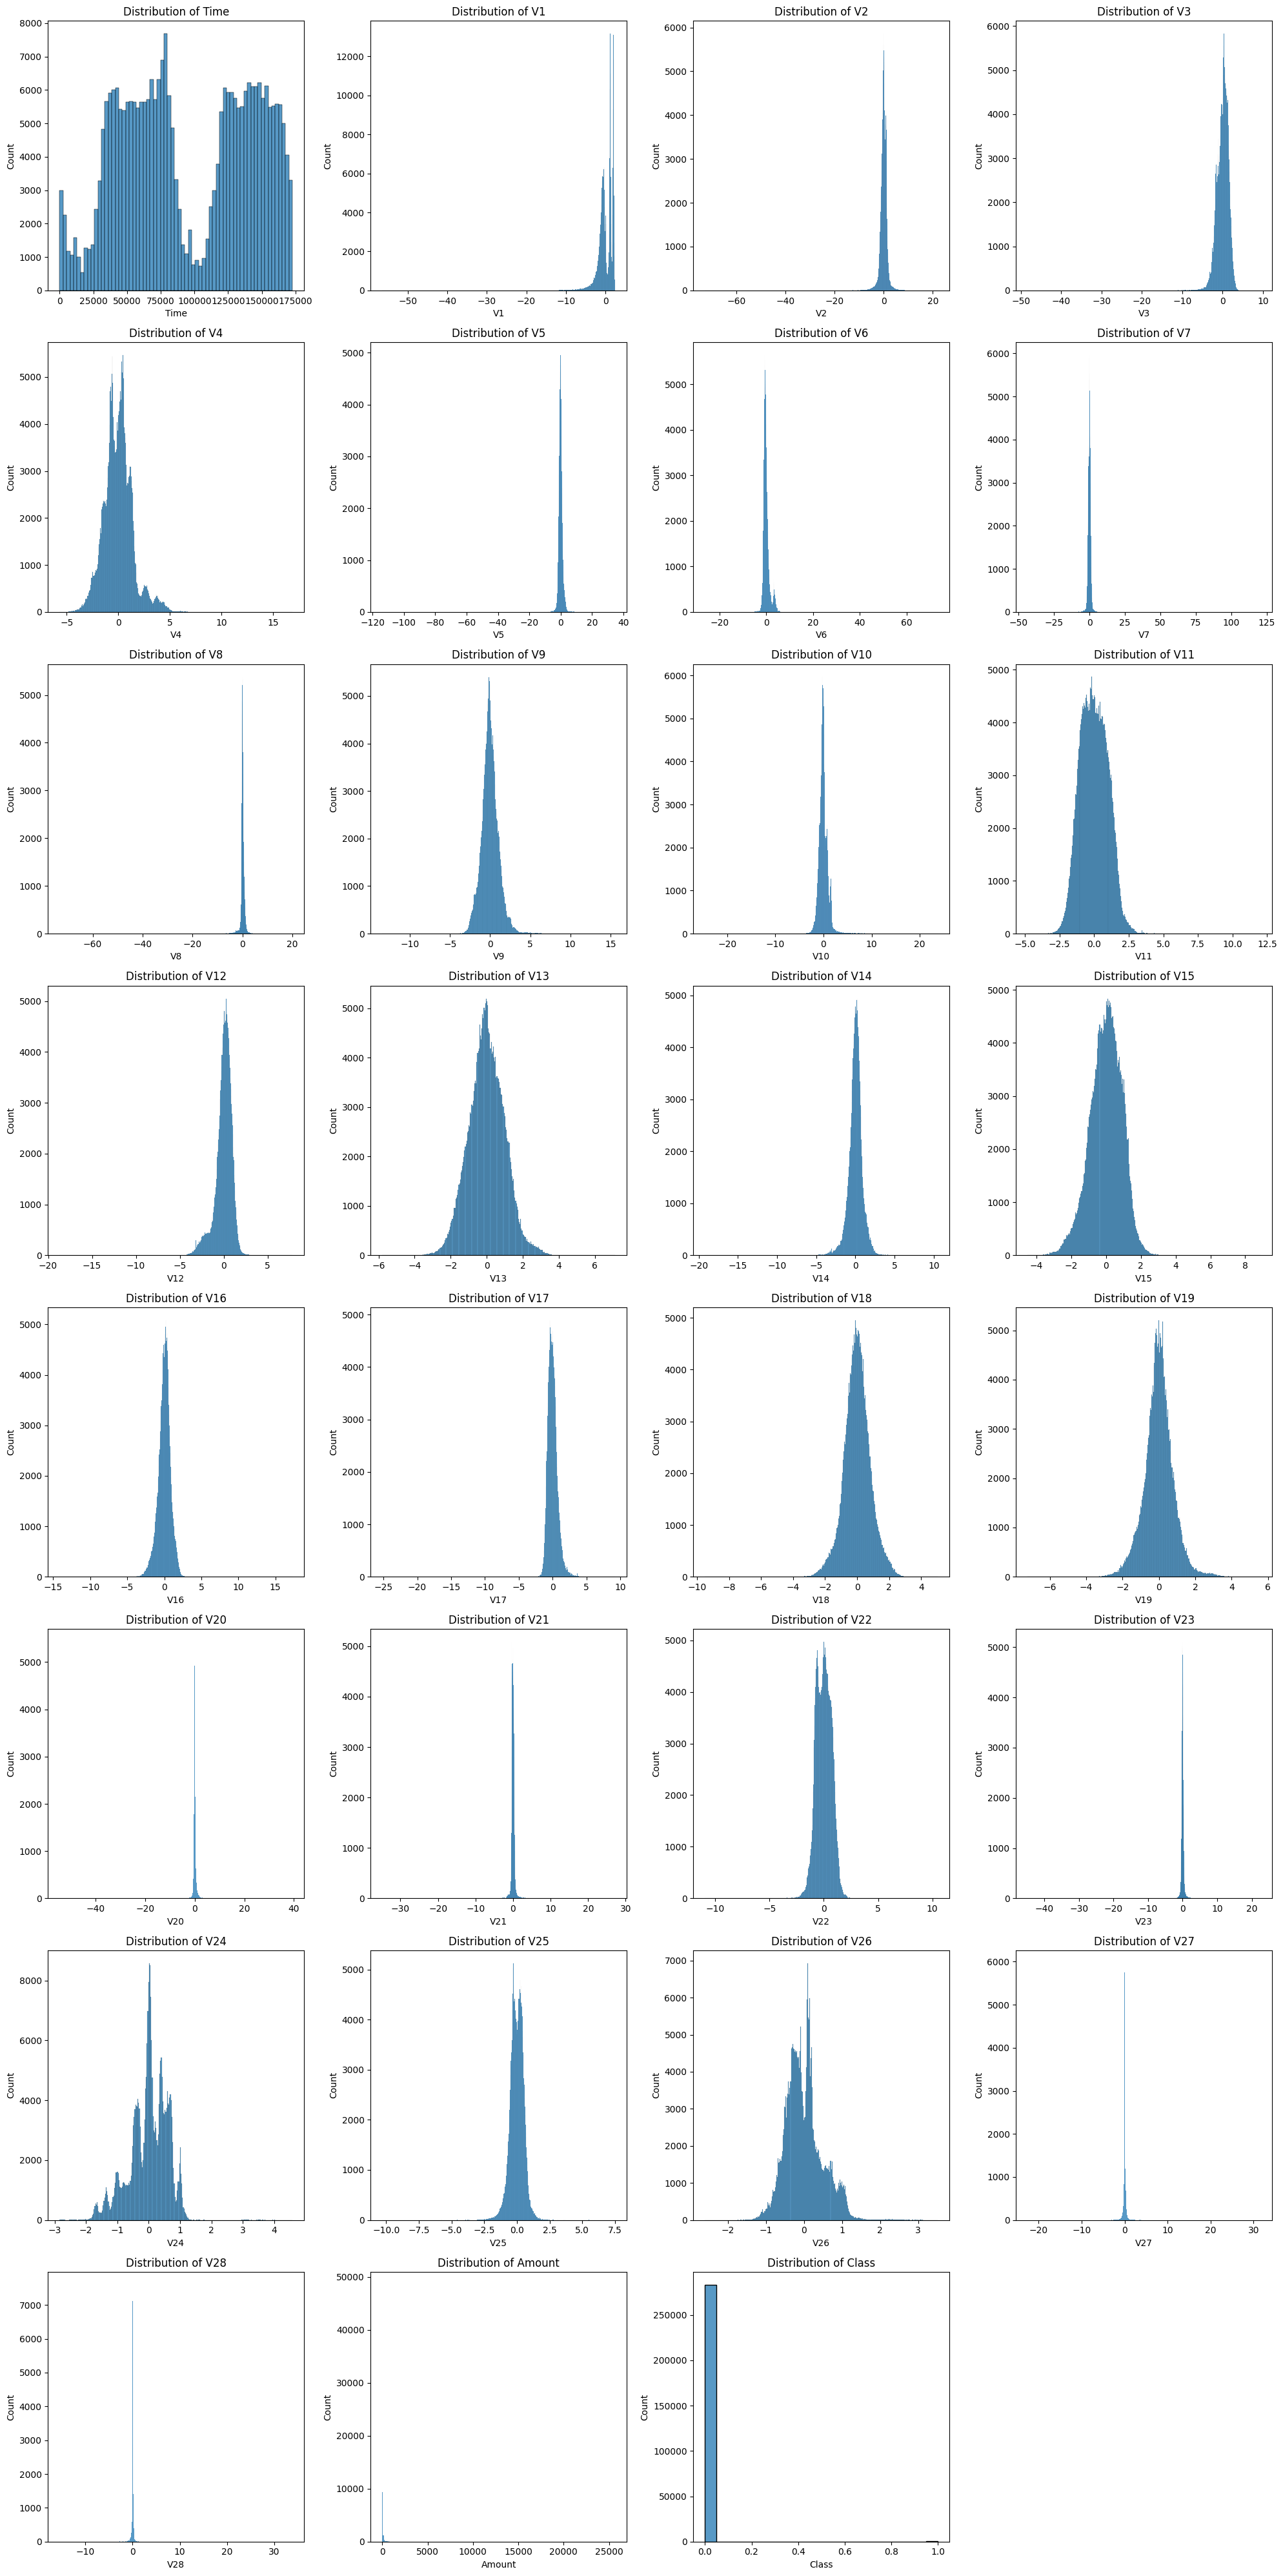

In [12]:
num_columns = len(df.columns)

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each variable
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df.columns[:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=False)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

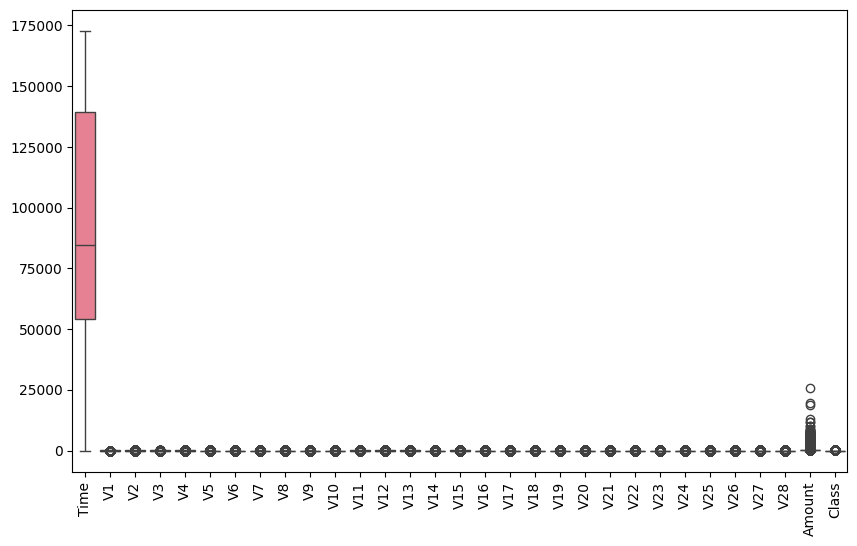

In [13]:
# data distribution using boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data = df, orient='v')
plt.xticks(rotation=90)
plt.show()

**Outliers findings and remove**

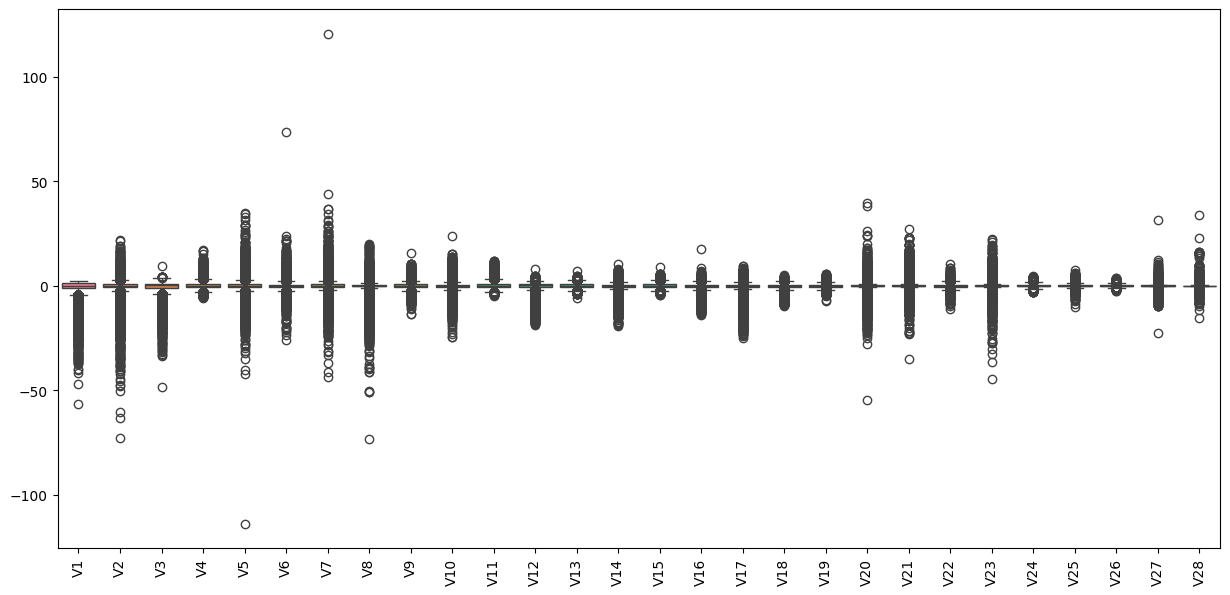

In [14]:
# outliers

plt.figure(figsize=(15, 7))
sns.boxplot(data = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']], orient='v')
plt.xticks(rotation=90)
plt.show()

In [15]:
# find the columns with outliers value
numerical_columns = df.select_dtypes(include=[np.number])

# Create an empty list to store columns with outliers
columns_with_outliers = []

for column in numerical_columns.columns:
    # Compute Z-scores for the current column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Define a threshold for considering an observation as an outlier (e.g., Z-score > 5)
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [16]:
# removing the outiers
# Define a function to remove outliers based on IQR

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to the dataset (df)
columns_with_outliers = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for column in columns_with_outliers:
    df = remove_outliers_iqr(df, column)

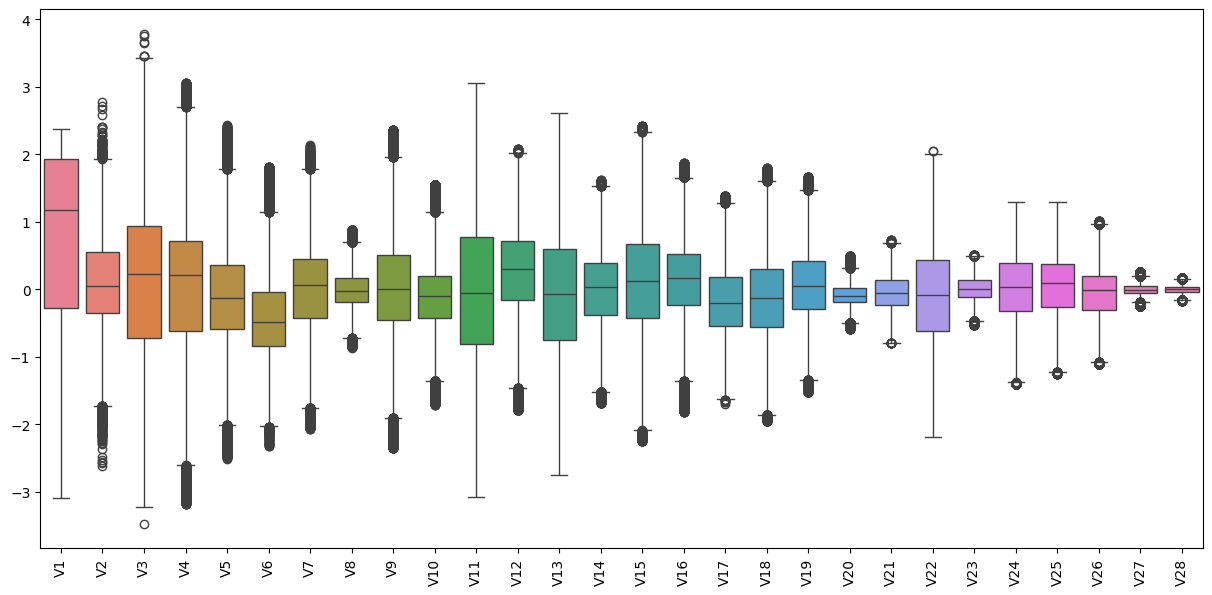

In [17]:
# data distribution
# after the removal of outliers

plt.figure(figsize=(15, 7))
sns.boxplot(data = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']], orient='v')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Correlation between variables
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.274290,-0.078600,-0.608111,-0.208182,0.305276,-0.202104,0.133259,-0.226934,0.215388,...,0.074647,0.109862,0.287949,0.004437,-0.374881,-0.017139,-0.097926,-0.330706,-0.041210,-0.006438
V1,0.274290,1.000000,-0.632084,-0.678235,0.190513,-0.259926,-0.075831,-0.432874,-0.458200,0.376895,...,-0.012455,0.053326,0.391656,-0.008568,0.159264,-0.014533,-0.306370,-0.476772,0.010854,-0.004370
V2,-0.078600,-0.632084,1.000000,0.190065,0.219989,0.598436,-0.161140,0.785749,0.111968,-0.204601,...,-0.128135,-0.185894,-0.254006,0.023186,-0.107315,0.020931,0.214428,0.328705,-0.378101,0.008238
V3,-0.608111,-0.678235,0.190065,1.000000,0.020835,-0.334509,0.341266,-0.118243,0.478589,-0.178753,...,-0.030208,-0.043460,-0.284208,0.096226,0.015386,-0.043872,0.328530,0.481232,0.015030,0.002148
V4,-0.208182,0.190513,0.219989,0.020835,1.000000,0.061359,0.196598,0.041881,0.033838,0.240448,...,-0.031546,-0.035402,0.032808,0.071320,0.237625,-0.124215,-0.079886,-0.004747,-0.042682,0.006966
V5,0.305276,-0.259926,0.598436,-0.334509,0.061359,1.000000,-0.137457,0.800058,-0.231373,-0.123548,...,-0.068455,-0.110788,-0.212783,-0.225404,-0.043458,0.034732,-0.024200,-0.031421,-0.263570,0.006228
V6,-0.202104,-0.075831,-0.161140,0.341266,0.196598,-0.137457,1.000000,-0.418202,0.626641,0.128122,...,0.052286,0.093179,-0.141654,-0.382813,0.036869,-0.074959,0.160174,0.071379,0.157433,0.000765
V7,0.133259,-0.432874,0.785749,-0.118243,0.041881,0.800058,-0.418202,1.000000,-0.352830,-0.227733,...,-0.120899,-0.165775,-0.246165,0.019065,-0.048731,0.044737,0.030975,0.118140,-0.150588,0.006048
V8,-0.226934,-0.458200,0.111968,0.478589,0.033838,-0.231373,0.626641,-0.352830,1.000000,0.024956,...,0.079052,0.035295,-0.055539,-0.139024,-0.151882,-0.018545,0.255377,0.280818,0.054724,-0.000609
V9,0.215388,0.376895,-0.204601,-0.178753,0.240448,-0.123548,0.128122,-0.227733,0.024956,1.000000,...,0.020951,0.082629,0.230401,0.016647,-0.073675,0.026207,-0.025933,-0.232666,-0.045072,-0.004185


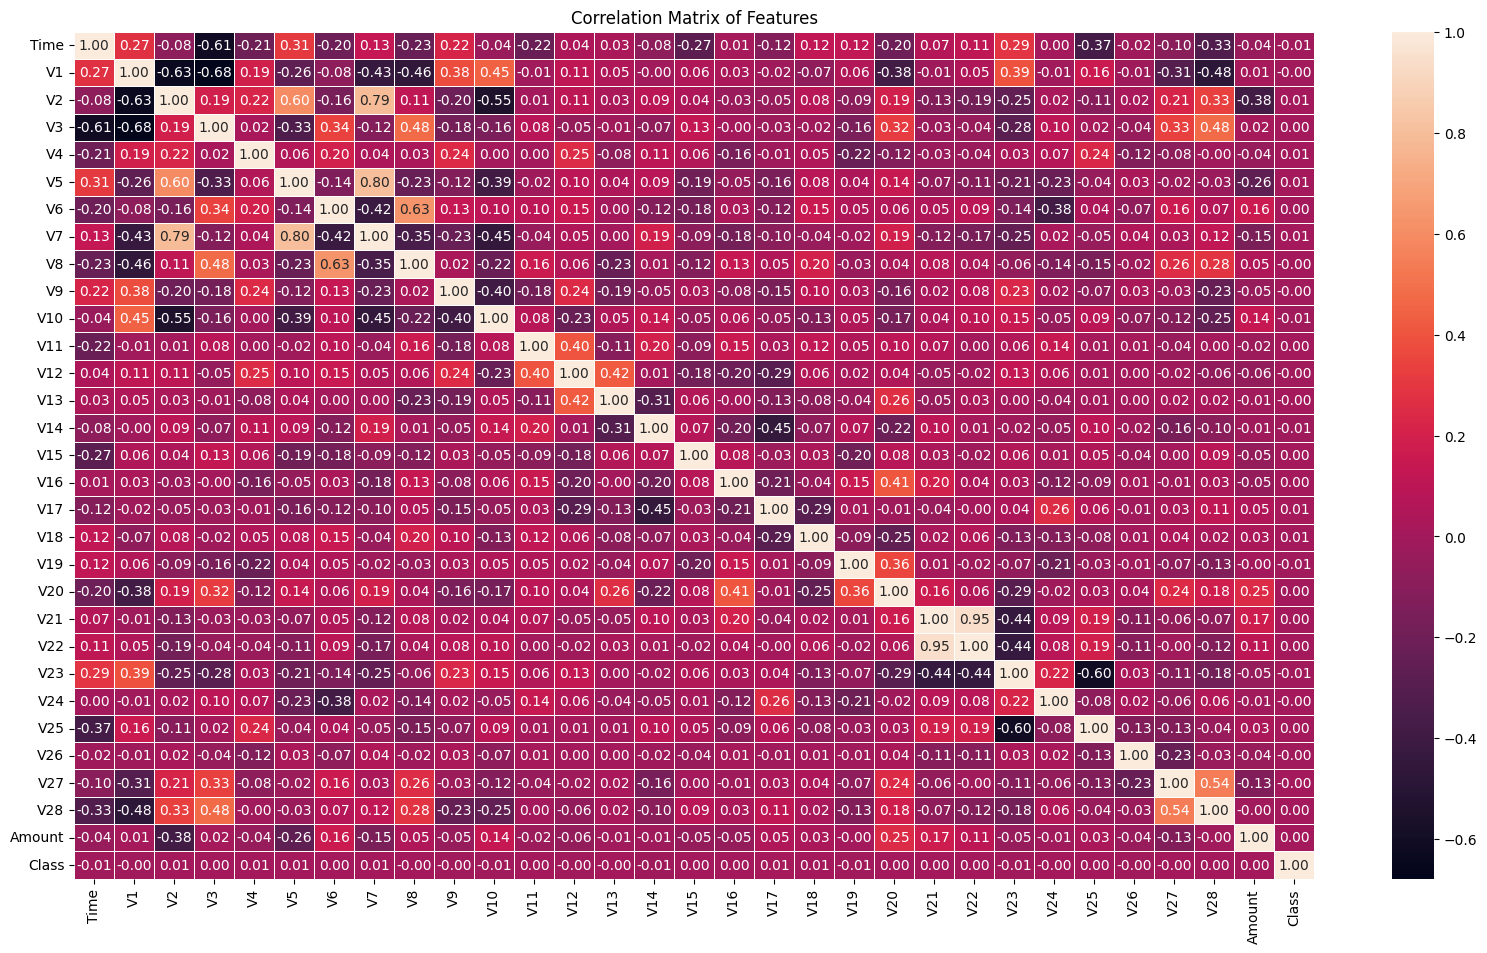

In [19]:
# Correlation Heatmap

plt.figure(figsize=(20, 11))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='rocket')
plt.title('Correlation Matrix of Features')

plt.show()

# plt.figure(figsize=(11, 7))
# sns.heatmap(df.corr(), annot=False, linewidths=0.5, cmap='rocket')
# plt.title('Correlation Heatmap')
# plt.show()

In [20]:
X = df.drop('Class', axis=1)     # droping the target column
y = df['Class']                  # & put the target column in a variable y


**Data Balancing**

In [21]:
# data balancing using SMOTEENN
# SMOTEENN --> Combine SMOTE and Edited Nearest Neighbors
from imblearn.combine import SMOTEENN

# apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after SMOTEENN:")
print(y_resampled.value_counts())

Class distribution after SMOTEENN:
Class
1    91082
0    75885
Name: count, dtype: int64


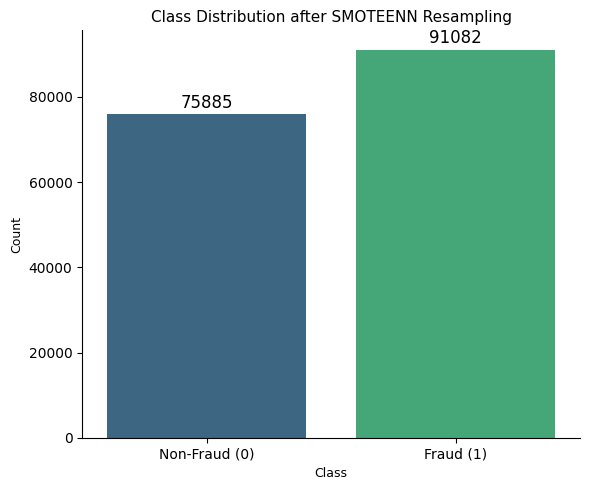

In [22]:
# bar plot for the resampled class distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=y_resampled, palette="viridis")

# set the labels for the classes
ax.set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])

# values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine

# Set plot titles and labels
plt.title('Class Distribution after SMOTEENN Resampling', fontsize=11)
plt.xlabel('Class', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
## feature scaling using Standard Scaler

s_saler = StandardScaler()
s_saler.fit(X_resampled)
scaled_X_resampled = s_saler.transform(X_resampled)

In [24]:
# split the dataset into training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(scaled_X_resampled, y_resampled, test_size=0.2, random_state=0)

In [25]:
# check the shapes to verify the split
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (133573, 30)
Testing set shape: (33394, 30)


**Model training & Evaluation**

In [26]:
# Support Vector Machine
from sklearn.svm import SVC

# SVM classifier
svm_clf = SVC(probability=True, random_state=0)

# Train the SVM classifier
svm_model = svm_clf.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Calculate Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
tn, fp, fn, tp = conf_matrix_svm.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_svm = tp / (tp + fn)  # Sensitivity or Recall
specificity_svm = tn / (tn + fp)  # Specificity
mcc_svm = matthews_corrcoef(y_test, svm_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_svm:.2f}")
print(f"Specificity: {specificity_svm:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_svm:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pred))

Accuracy of SVM: 99.97
Sensitivity (Recall): 1.00
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15020
           1       1.00      1.00      1.00     18374

    accuracy                           1.00     33394
   macro avg       1.00      1.00      1.00     33394
weighted avg       1.00      1.00      1.00     33394



In [27]:
conf_matrix_svm     # svm model CM on test set

array([[15010,    10],
       [    0, 18374]])

In [28]:
tn, fp, fn, tp    #svm

(15010, 10, 0, 18374)

Area Under the Curve (AUC): 1.00


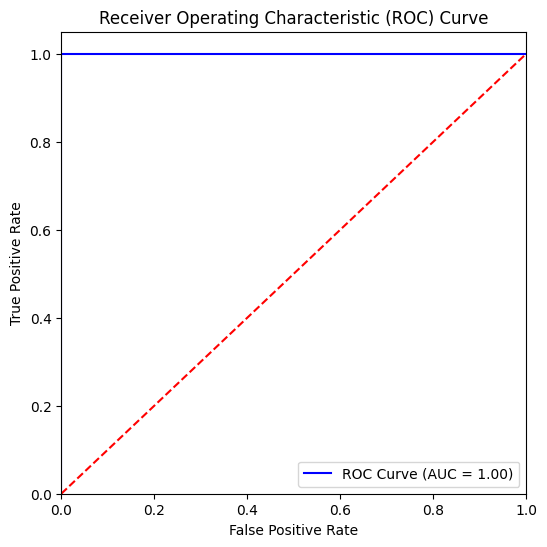

In [29]:
# AUC and ROC
svm_prob = svm_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, svm_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

# Calculate Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = conf_matrix_rf.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_rf = tp / (tp + fn)  # Sensitivity or Recall
specificity_rf = tn / (tn + fp)  # Specificity
mcc_rf = matthews_corrcoef(y_test, rf_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_rf:.2f}")
print(f"Specificity: {specificity_rf:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.2f}")


print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 100.00
Sensitivity (Recall): 1.00
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15020
           1       1.00      1.00      1.00     18374

    accuracy                           1.00     33394
   macro avg       1.00      1.00      1.00     33394
weighted avg       1.00      1.00      1.00     33394



Area Under the Curve (AUC): 1.00


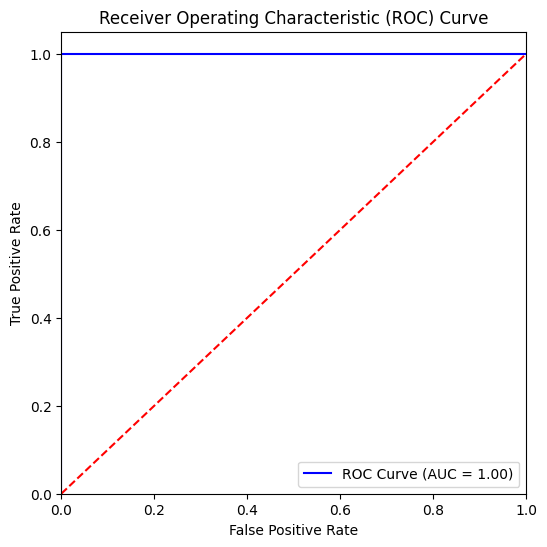

In [31]:
# AUC and ROC
rf_prob = rfc.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, rf_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

# Calculate Confusion Matrix
conf_matrix_lg = confusion_matrix(y_test, lg_pred)
tn, fp, fn, tp = conf_matrix_lg.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_lg = tp / (tp + fn)  # Sensitivity or Recall
specificity_lg = tn / (tn + fp)  # Specificity
mcc_lg = matthews_corrcoef(y_test, lg_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_lg:.2f}")
print(f"Specificity: {specificity_lg:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_lg:.2f}")

print("Classification Report:")
print(classification_report(y_test, lg_pred))

Accuracy of LG: 96.74
Sensitivity (Recall): 0.99
Specificity: 0.94
Matthews Correlation Coefficient (MCC): 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     15020
           1       0.95      0.99      0.97     18374

    accuracy                           0.97     33394
   macro avg       0.97      0.96      0.97     33394
weighted avg       0.97      0.97      0.97     33394



Area Under the Curve (AUC): 0.98


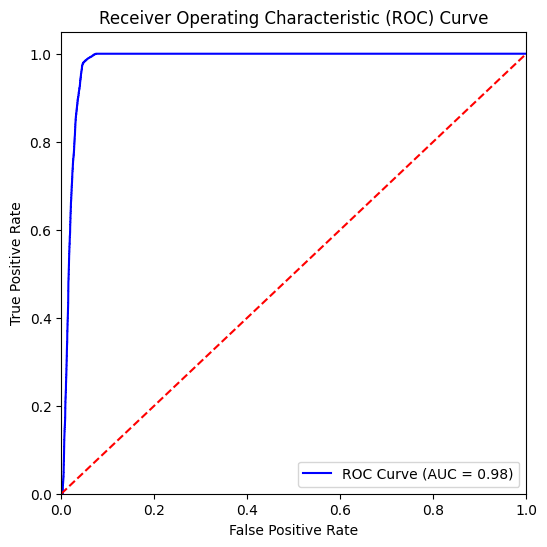

In [33]:
# AUC and ROC
lg_prob = lg_m.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, lg_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lg_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_m = nb.fit(X_train, y_train)
nb_pred = nb_m.predict(X_test)
nb_as = accuracy_score(y_test, nb_pred) * 100
nb_as = "{:.2f}".format(nb_as)
print('Accuracy of NB:', nb_as)

# Calculate Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, nb_pred)
tn, fp, fn, tp = conf_matrix_nb.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_nb = tp / (tp + fn)  # Sensitivity or Recall
specificity_nb = tn / (tn + fp)  # Specificity
mcc_nb = matthews_corrcoef(y_test, nb_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_nb:.2f}")
print(f"Specificity: {specificity_nb:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_nb:.2f}")

print("Classification Report:")
print(classification_report(y_test, nb_pred))

Accuracy of NB: 92.38
Sensitivity (Recall): 0.90
Specificity: 0.95
Matthews Correlation Coefficient (MCC): 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     15020
           1       0.96      0.90      0.93     18374

    accuracy                           0.92     33394
   macro avg       0.92      0.93      0.92     33394
weighted avg       0.93      0.92      0.92     33394



Area Under the Curve (AUC): 0.98


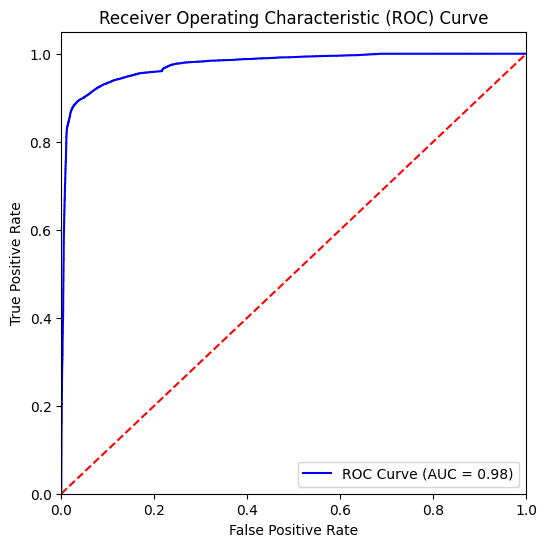

In [35]:
# AUC and ROC
nb_prob = nb_m.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, nb_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, nb_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_m = knn.fit(X_train, y_train)
knn_pred = knn_m.predict(X_test)
kn_as = accuracy_score(y_test, knn_pred) * 100
kn_as = "{:.2f}".format(kn_as)
print('Accuracy of KNN:', kn_as)

# Calculate Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = conf_matrix_knn.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_knn = tp / (tp + fn)  # Sensitivity or Recall
specificity_knn = tn / (tn + fp)  # Specificity
mcc_knn = matthews_corrcoef(y_test, knn_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_knn:.2f}")
print(f"Specificity: {specificity_knn:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_knn:.2f}")

print("Classification Report:")
print(classification_report(y_test, knn_pred))

Accuracy of KNN: 99.97
Sensitivity (Recall): 1.00
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15020
           1       1.00      1.00      1.00     18374

    accuracy                           1.00     33394
   macro avg       1.00      1.00      1.00     33394
weighted avg       1.00      1.00      1.00     33394



Area Under the Curve (AUC): 1.00


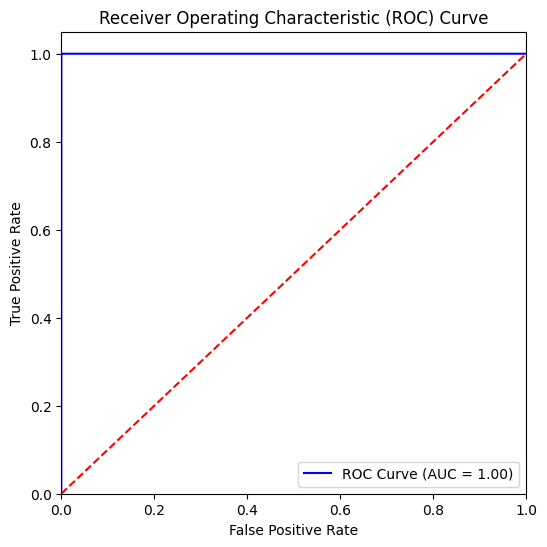

In [37]:
# AUC and ROC
knn_prob = knn_m.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, knn_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_m = dtc.fit(X_train, y_train)
dt_pred = dt_m.predict(X_test)
dt_as = accuracy_score(y_test, dt_pred) * 100
dt_as = "{:.2f}".format(dt_as)
print("Accuracy of DT:", dt_as)

# Calculate Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
tn, fp, fn, tp = conf_matrix_dt.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_dt = tp / (tp + fn)  # Sensitivity or Recall
specificity_dt = tn / (tn + fp)  # Specificity
mcc_dt = matthews_corrcoef(y_test, dt_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_dt:.2f}")
print(f"Specificity: {specificity_dt:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_dt:.2f}")

print("Classification Report:")
print(classification_report(y_test, dt_pred))

Accuracy of DT: 93.07
Sensitivity (Recall): 1.00
Specificity: 0.85
Matthews Correlation Coefficient (MCC): 0.87
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     15020
           1       0.89      1.00      0.94     18374

    accuracy                           0.93     33394
   macro avg       0.94      0.92      0.93     33394
weighted avg       0.94      0.93      0.93     33394



Area Under the Curve (AUC): 0.92


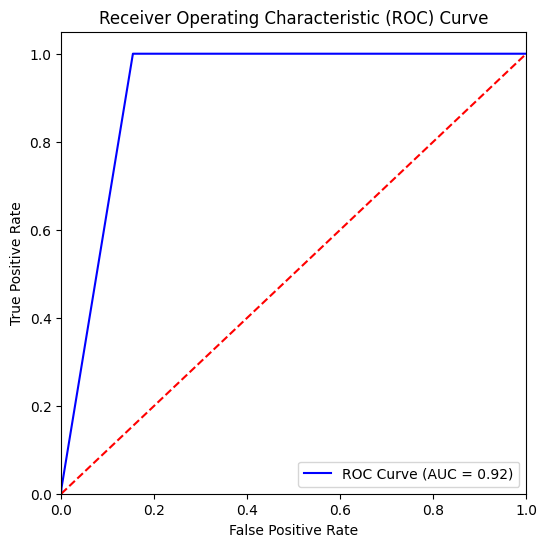

In [39]:
# AUC and ROC
dt_prob = dt_m.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Fraud)
auc = roc_auc_score(y_test, dt_prob)
print(f"Area Under the Curve (AUC): {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

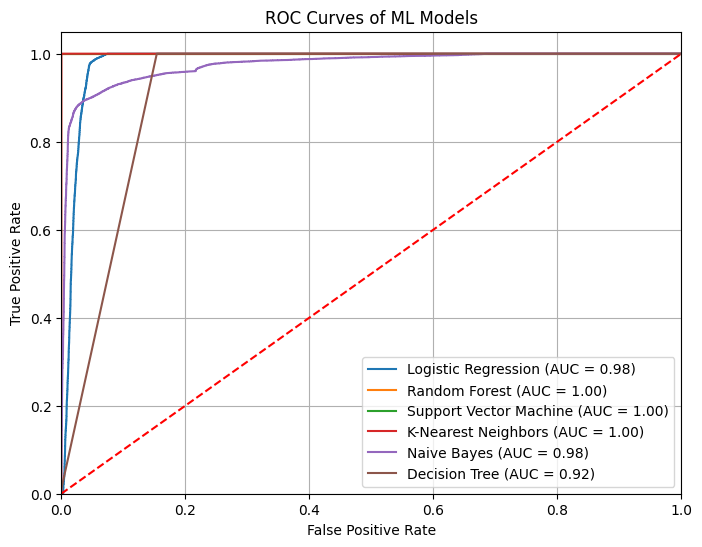

In [40]:
# trained models and their predictions
models = {
    'Logistic Regression': (lg_m, X_test),
    'Random Forest': (rf_m, X_test),
    'Support Vector Machine': (svm_clf, X_test),
    'K-Nearest Neighbors': (knn, X_test),
    'Naive Bayes': (nb_m, X_test),
    'Decision Tree': (dtc, X_test)
}

# plot
plt.figure(figsize=(8, 6))

for model_name, (model, test_data) in models.items():
    # Get probabilities for the positive class
    if model_name in ['Logistic Regression', 'Random Forest', 'Naive Bayes']:
        probs = model.predict_proba(test_data)[:, 1]  # For LR, RF, NB
    elif model_name == 'Support Vector Machine':
        probs = model.decision_function(test_data)  # Use decision function for SVM
    else:  # For KNN and Decision Tree
        probs = model.predict_proba(test_data)[:, 1]  # Use probabilities for KNN and DT

    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of ML Models')
plt.legend(loc='lower right')
plt.grid()

plt.show()


Confusion matrix of SVM


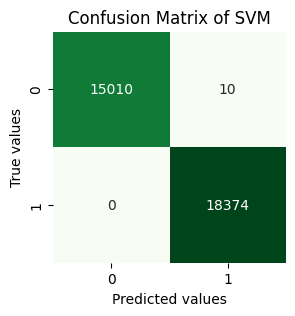

In [41]:
print('Confusion matrix of SVM')

cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of SVM")
plt.show()

Confusion matrix of RF


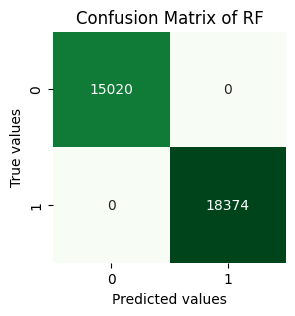

In [42]:
print('Confusion matrix of RF')

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of RF")
plt.show()

Confusion matrix of LR


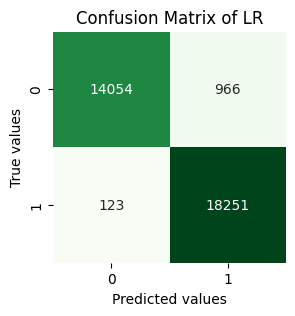

In [43]:
print('Confusion matrix of LR')

cm = confusion_matrix(y_test, lg_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of LR")
plt.show()

Confusion matrix of NB


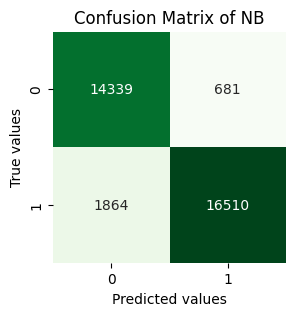

In [44]:
print('Confusion matrix of NB')

cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of NB")
plt.show()

Confusion matrix of KNN


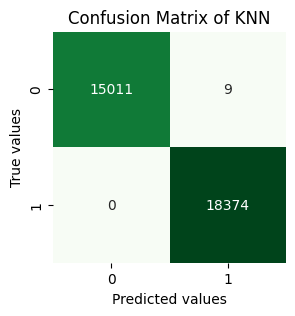

In [45]:
print('Confusion matrix of KNN')

cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of KNN")
plt.show()

Confusion matrix of DT


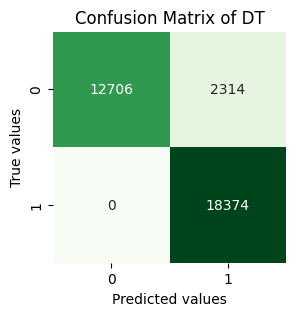

In [46]:
print('Confusion matrix of DT')

cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of DT")
plt.show()

**Feature Importance**

In [47]:
# important features of RF model
from sklearn.inspection import permutation_importance

feature_names = df.columns[:-1]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

result = permutation_importance(rf_m, X_test_df, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# print(perm_importance_df)

# Display the top 15 features
top_15_features_rf = perm_importance_df.head(15)
print(top_15_features_rf)

   Feature  Importance
0     Time    0.183323
14     V14    0.145787
23     V23    0.127712
1       V1    0.119926
8       V8    0.092990
3       V3    0.068848
18     V18    0.061760
7       V7    0.049314
11     V11    0.044664
28     V28    0.037824
5       V5    0.034629
26     V26    0.033494
20     V20    0.033407
24     V24    0.031590
12     V12    0.019345


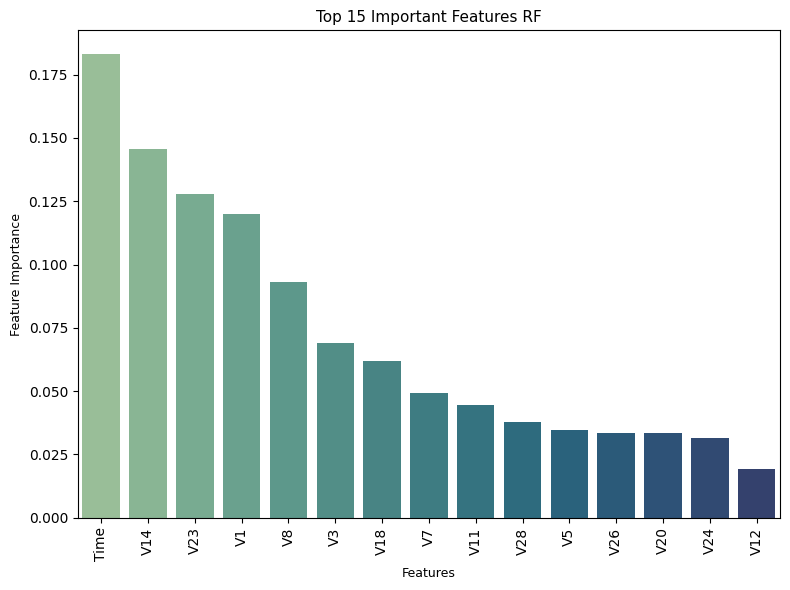

In [48]:
# Visualize the top 15 features of RF model
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Importance', data=top_15_features_rf, palette='crest')

# Customize the plot
plt.title('Top 15 Important Features RF', fontsize=11)
plt.xlabel('Features', fontsize=9)
plt.ylabel('Feature Importance', fontsize=9)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()

plt.show()


In [49]:
# important features of SVM model

from sklearn.inspection import permutation_importance

feature_names = df.columns[:-1]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

result = permutation_importance(svm_clf, X_test_df, y_test, n_repeats=10, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the top 15 features
top_15_features_svm = perm_importance_df.head(15)
print(top_15_features_svm)

   Feature  Importance
0     Time    0.080811
14     V14    0.051144
24     V24    0.028122
5       V5    0.025169
13     V13    0.024459
26     V26    0.024307
15     V15    0.022968
29  Amount    0.020905
27     V27    0.020453
19     V19    0.020174
16     V16    0.018860
23     V23    0.018788
4       V4    0.018692
10     V10    0.018476
6       V6    0.018345


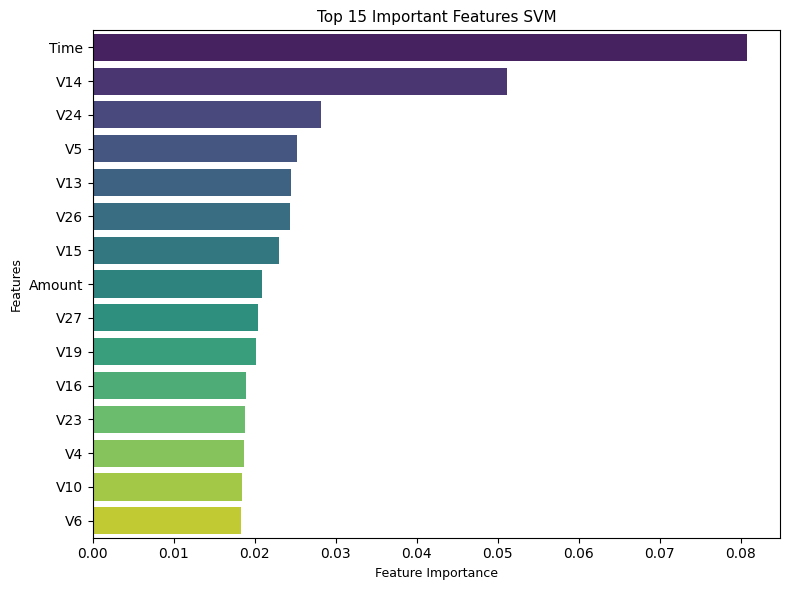

In [50]:
# Visualize the top 15 features of SVM model
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_features_svm, palette='viridis')

# Customize the plot
plt.title('Top 15 Important Features SVM', fontsize=11)
plt.xlabel('Feature Importance', fontsize=9)
plt.ylabel('Features', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()
